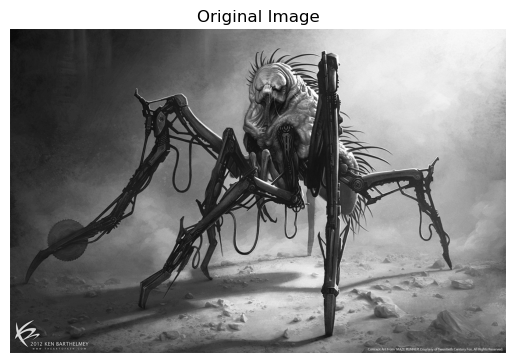

In [5]:
import cv2

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Display the uploaded image
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms(original_image, filtered_image, filter_name="Filtered Image"):
    # Plot Histograms for Original and Filtered Image
    plt.figure(figsize=(10, 5))

    # Histogram for Original Image
    plt.subplot(1, 2, 1)
    sns.histplot(original_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)

    # Histogram for Filtered Image
    plt.subplot(1, 2, 2)
    sns.histplot(filtered_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title(f"Histogram of {filter_name}")
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

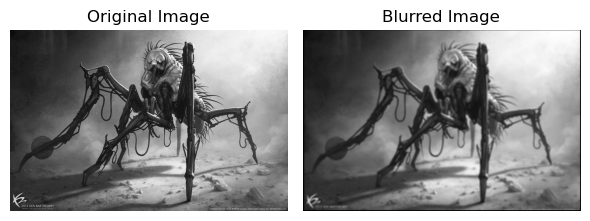

In [128]:
import numpy as np

def manual_blur(image, kernel_size=5):
    # Define a box filter kernel (mean filter) with dynamic size
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

    # Pad the image to handle borders
    image_padded = np.pad(image, ((kernel_size // 2, kernel_size // 2),
                                  (kernel_size // 2, kernel_size // 2)), mode='constant')

    result = np.zeros_like(image)  # To store the filtered image

    # Apply the filter manually (convolution)
    for i in range(kernel_size // 2, image.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, image.shape[1] - kernel_size // 2):
            # Apply the filter to the neighborhood of the current pixel
            region = image_padded[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                  j - kernel_size // 2:j + kernel_size // 2 + 1]  # kernel_size x kernel_size region
            result[i, j] = np.sum(region * kernel)  # Convolution operation

    return result

# Apply manual blurring
blurred_image = manual_blur(image, kernel_size=9)

# Display the result
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Blurred Image")
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

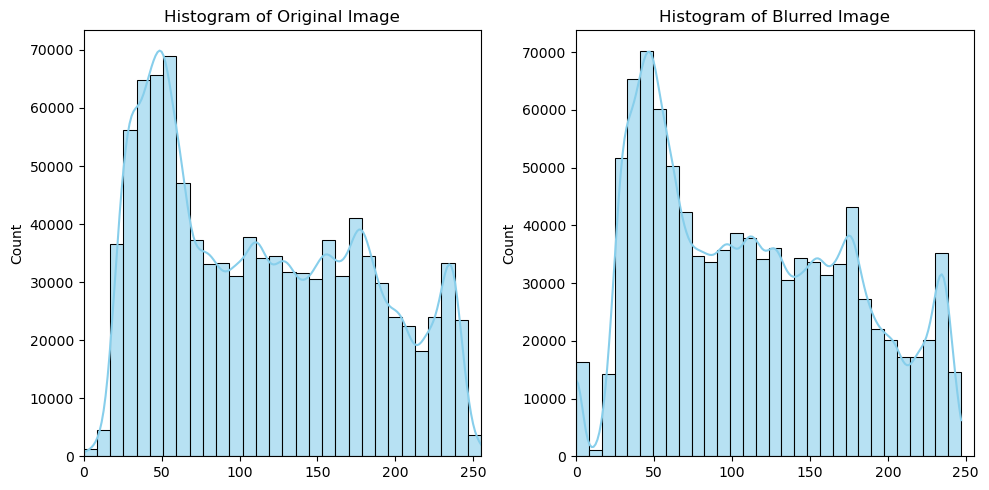

In [130]:

# Plot histograms
plot_histograms(image, blurred_image, filter_name="Blurred Image")


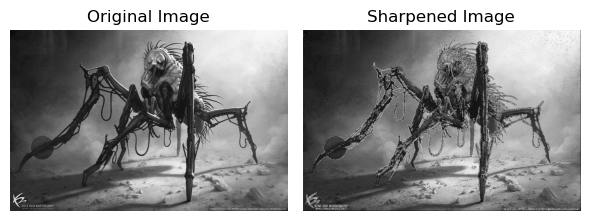

In [132]:
def manual_sharpen(image):
    # Define the sharpening kernel
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])  # Sharpening filter
    
    # Ensure the image has the correct shape (2D for grayscale)
    if len(image.shape) == 3:  # if the image has 3 channels (RGB), convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Padding the image with zeros (black padding) around the border
    image_padded = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    
    # Create an empty result array of the same shape as the original image
    result = np.zeros_like(image)
    
    # Apply the filter manually (convolution)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Apply the filter to the neighborhood of the current pixel
            region = image_padded[i-1:i+2, j-1:j+2]  # 3x3 region
            result[i, j] = np.sum(region * kernel)  # Convolution operation
    
    # Ensure the result is clipped to the valid range [0, 255]
    result = np.clip(result, 0, 255)
    
    return result.astype(np.uint8)

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Apply manual sharpening
sharpened_image = manual_sharpen(image)

# Display the result
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


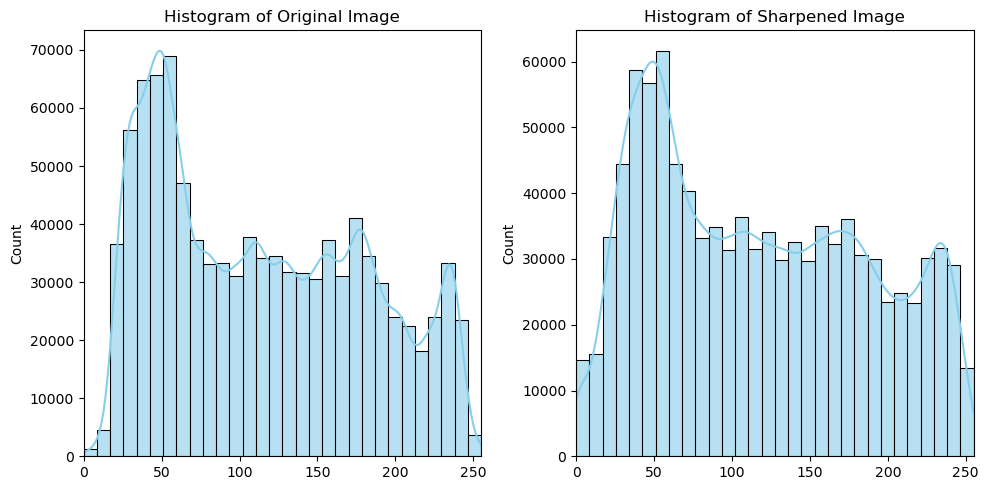

In [134]:
# Plot histograms
plot_histograms(image, sharpened_image, filter_name="Sharpened Image")

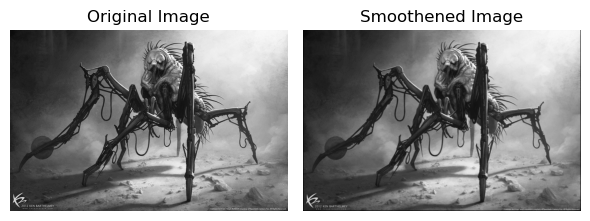

In [136]:
def Smoothened_blur(image, kernel_size=5, sigma=1.0):
    # Generate a Gaussian kernel
    kernel = np.zeros((kernel_size, kernel_size), np.float32)
    center = kernel_size // 2

    # Create a 5x5 Gaussian kernel (you can adjust size and sigma)
    for x in range(kernel_size):
        for y in range(kernel_size):
            kernel[x, y] = (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))

    kernel /= np.sum(kernel)  # Normalize the kernel

    image_padded = np.pad(image, ((center, center), (center, center)), mode='constant')  # Padding the image
    result = np.zeros_like(image)  # To store the filtered image

    # Apply the filter manually (convolution)
    for i in range(center, image.shape[0] - center):
        for j in range(center, image.shape[1] - center):
            # Apply the filter to the neighborhood of the current pixel
            region = image_padded[i-center:i+center+1, j-center:j+center+1]  # kernel_size x kernel_size region
            result[i, j] = np.sum(region * kernel)  # Convolution operation

    return result

# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Apply manual Gaussian blur
Smoothened_image = manual_gaussian_blur(image, kernel_size=5, sigma=1.0)

# Display the result
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Smoothened Image")
plt.imshow(Smoothened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

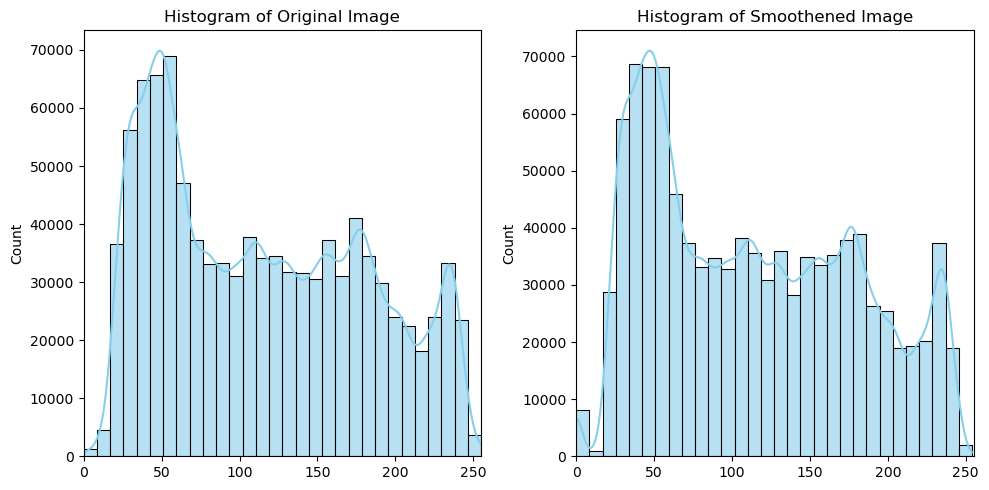

In [138]:
# Plot histograms
plot_histograms(image, Smoothened_image, filter_name="Smoothened Image")

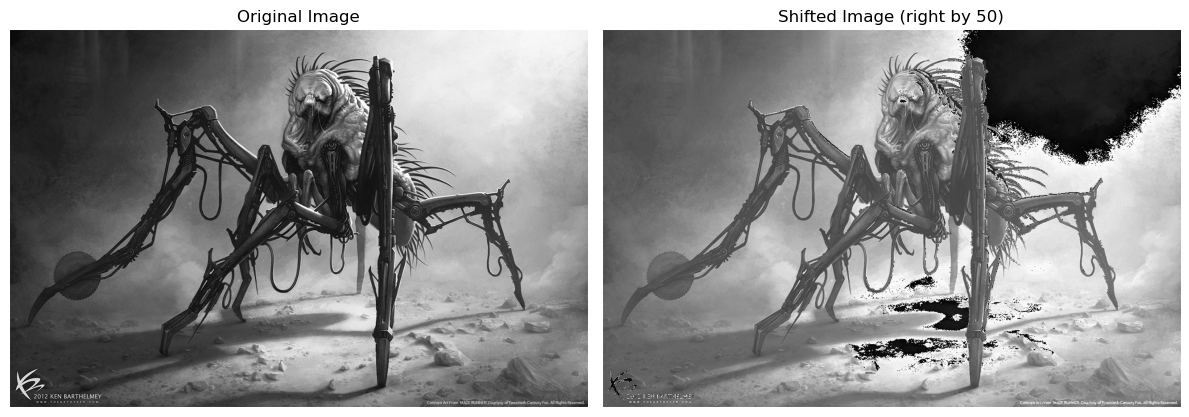

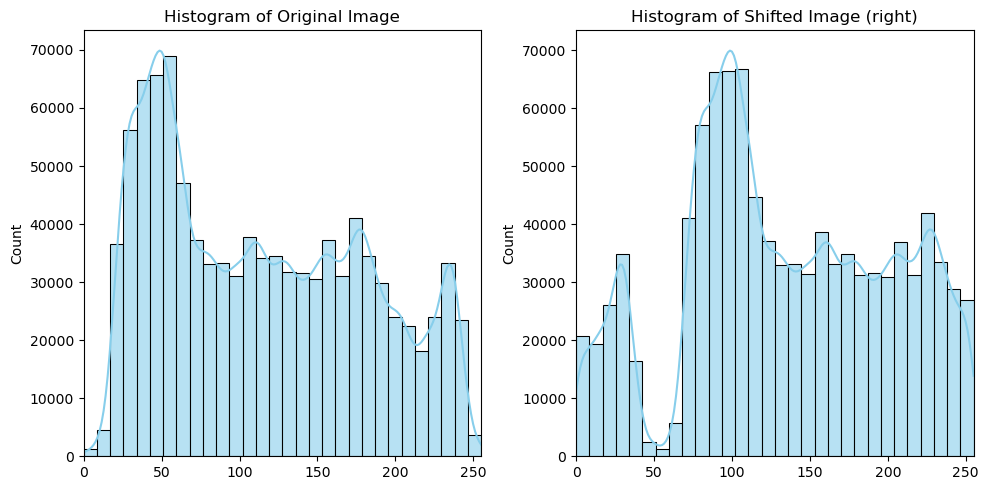

In [140]:
# Function to shift the image histogram to the left or right
def shift_histogram(image, shift_value, direction="right"):
    # Ensure the image values are in the valid range (0-255)
    if direction == "right":
        shifted_image = np.clip(image + shift_value, 0, 255)
    elif direction == "left":
        shifted_image = np.clip(image - shift_value, 0, 255)
    else:
        raise ValueError("Direction should be either 'right' or 'left'")

    return shifted_image

# Function to plot the histogram and image
def plot_image_and_histograms(original_image, shifted_image, shift_value, direction):
    # Plot the original and shifted images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original Image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Shifted Image
    axes[1].imshow(shifted_image, cmap='gray')
    axes[1].set_title(f"Shifted Image ({direction} by {shift_value})")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot the histograms
    plt.figure(figsize=(10, 5))

    # Original Image Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(original_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)

    # Shifted Image Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(shifted_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title(f"Histogram of Shifted Image ({direction})")
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Shift the image histogram (e.g., to the right by 50)
shifted_image_right = shift_histogram(image, 50, direction="right")
plot_image_and_histograms(image, shifted_image_right, 50, direction="right")


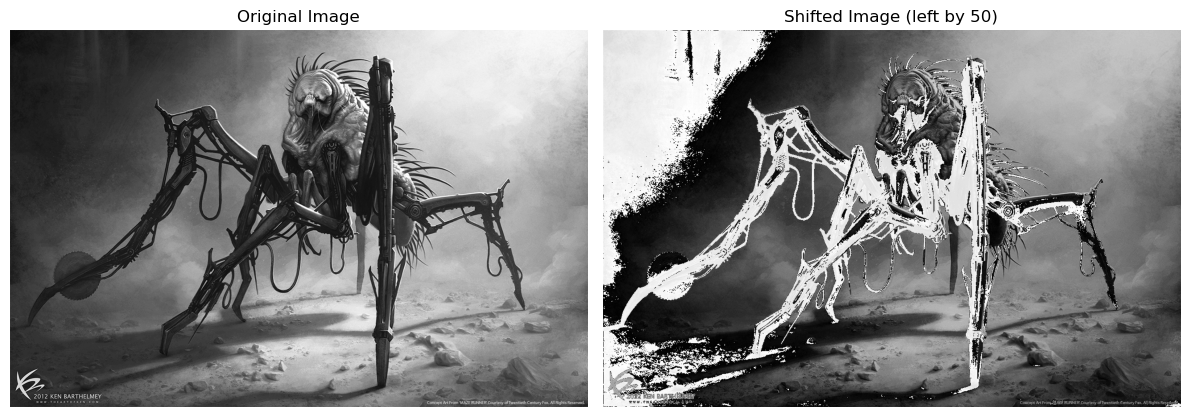

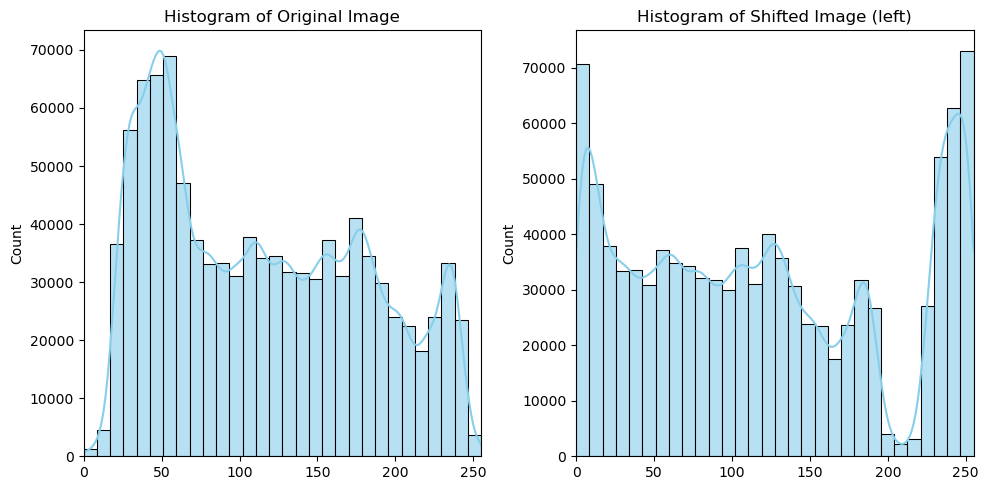

In [142]:
# Plot the results
shifted_image_left = shift_histogram(image, 50, direction="left")
plot_image_and_histograms(image, shifted_image_left, 50, direction="left")

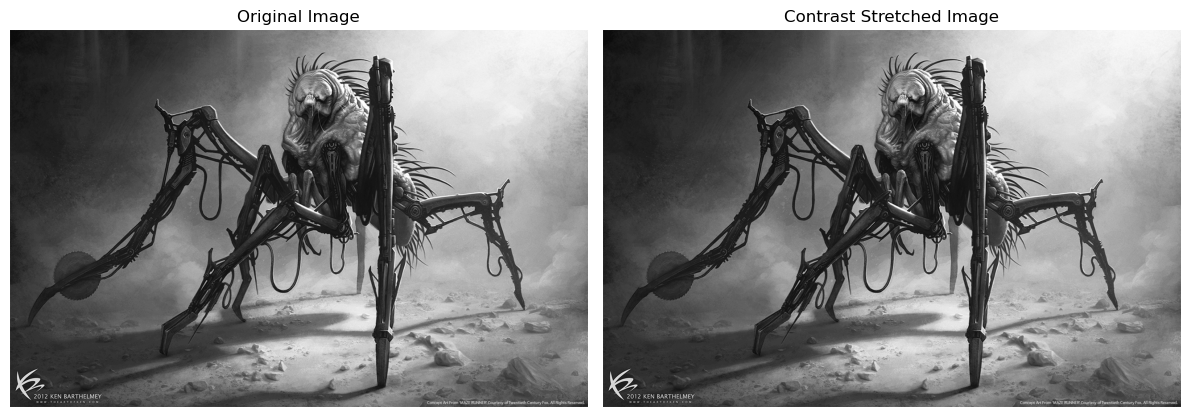

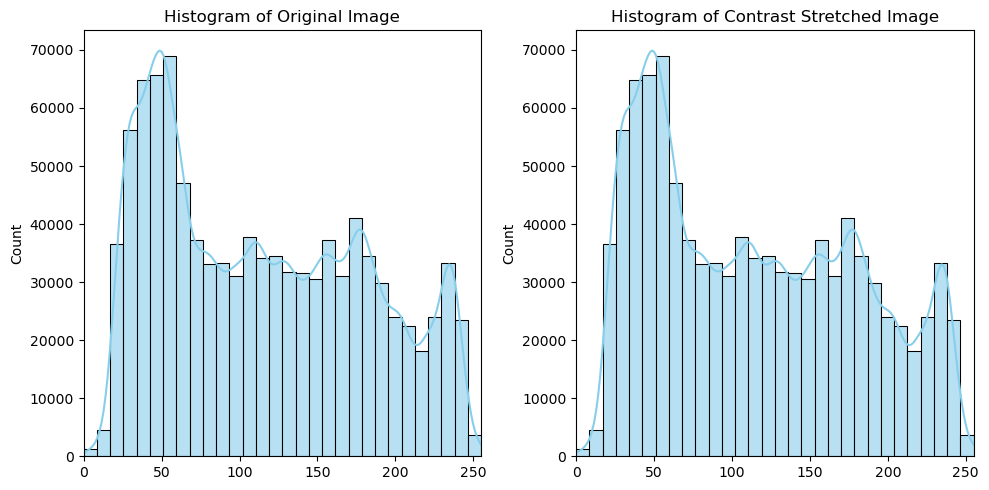

In [146]:
def contrast_stretching(image):
    # Get the minimum and maximum pixel values in the original image
    R_min = np.min(image)
    R_max = np.max(image)

    # Apply contrast stretching formula
    S = (image - R_min) * (255 / (R_max - R_min))

    # Convert to uint8 to ensure valid pixel values (0-255)
    S = np.uint8(S)

    return S

# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Apply contrast stretching
contrast_stretched_image = contrast_stretching(image)

# Plot the original and contrast stretched images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Contrast Stretched Image
axes[1].imshow(contrast_stretched_image, cmap='gray')
axes[1].set_title("Contrast Stretched Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Plot the histograms
plt.figure(figsize=(10, 5))

# Original Image Histogram
plt.subplot(1, 2, 1)
sns.histplot(image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Original Image")
plt.xlim(0, 255)

# Contrast Stretched Image Histogram
plt.subplot(1, 2, 2)
sns.histplot(contrast_stretched_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Contrast Stretched Image")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()


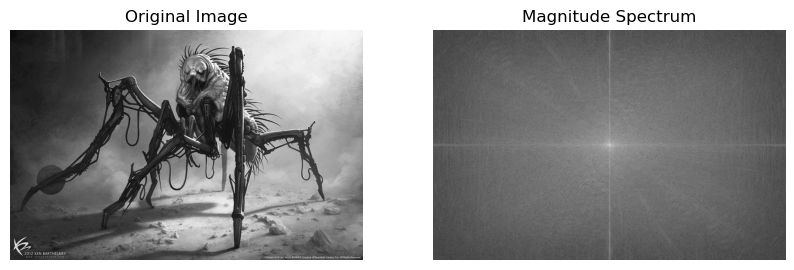

In [148]:
# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Perform DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Calculate the magnitude spectrum (log scale for visibility)
magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude_spectrum = np.log(magnitude_spectrum + 1)

# Plot the original image and the magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()


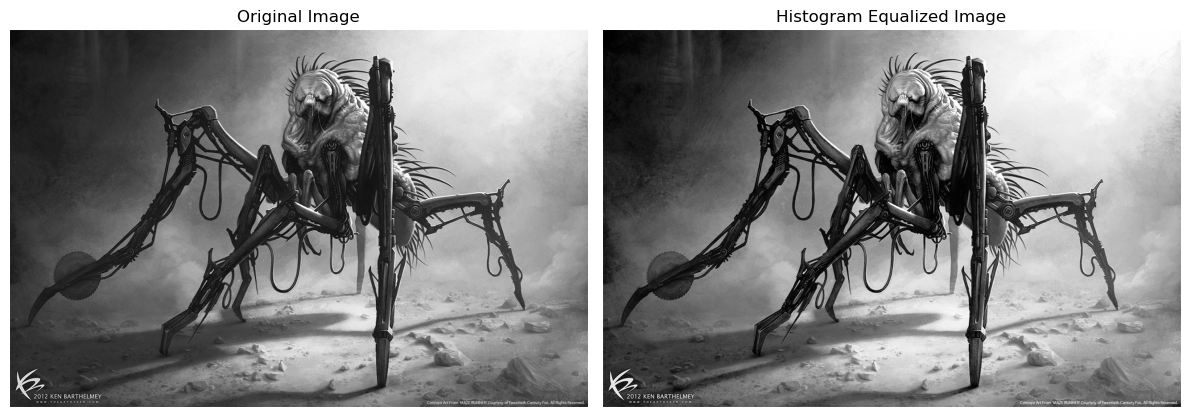

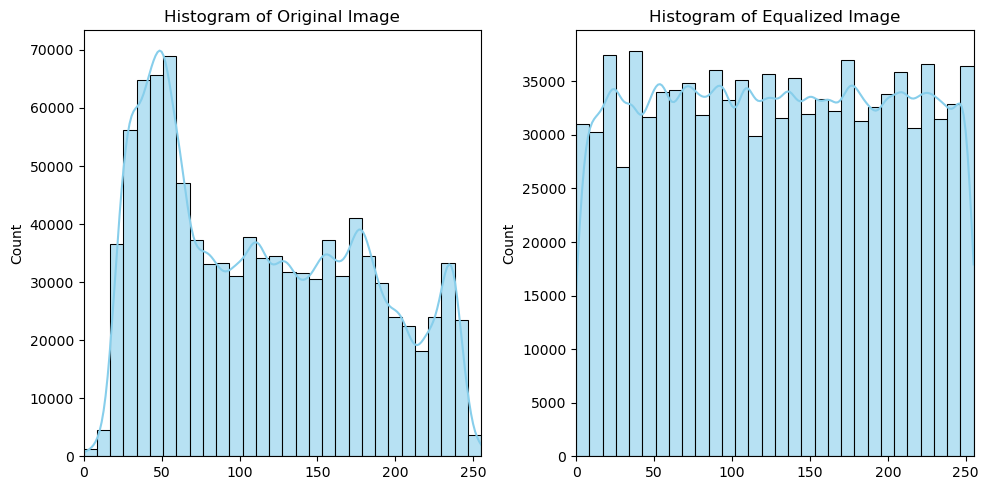

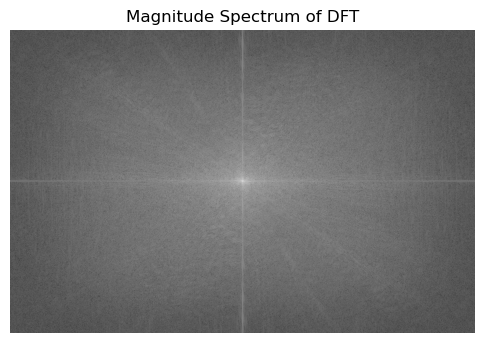

In [150]:
def apply_histogram_equalization(image):
    # Apply histogram equalization to the image
    return cv2.equalizeHist(image)

def compute_dft(image):
    # Convert the image to float32 for DFT
    image_float32 = np.float32(image)

    # Compute the DFT of the image
    dft = cv2.dft(image_float32, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency component to the center
    dft_shift = np.fft.fftshift(dft)

    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

    return dft_shift, magnitude_spectrum

def plot_image_and_histograms(original_image, eq_image, magnitude_spectrum):
    # Plot the original and histogram equalized images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original Image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Equalized Image
    axes[1].imshow(eq_image, cmap='gray')
    axes[1].set_title("Histogram Equalized Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot the histograms
    plt.figure(figsize=(10, 5))

    # Original Image Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(original_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)

    # Equalized Image Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(eq_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Equalized Image")
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

    # Plot the Magnitude Spectrum of the DFT
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title("Magnitude Spectrum of DFT")
    plt.axis('off')
    plt.show()

# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Apply histogram equalization
    equalized_image = apply_histogram_equalization(image)

    # Compute the DFT and magnitude spectrum of the equalized image
    dft_shift, magnitude_spectrum = compute_dft(equalized_image)

    # Plot images, histograms, and magnitude spectrum
    plot_image_and_histograms(image, equalized_image, magnitude_spectrum)

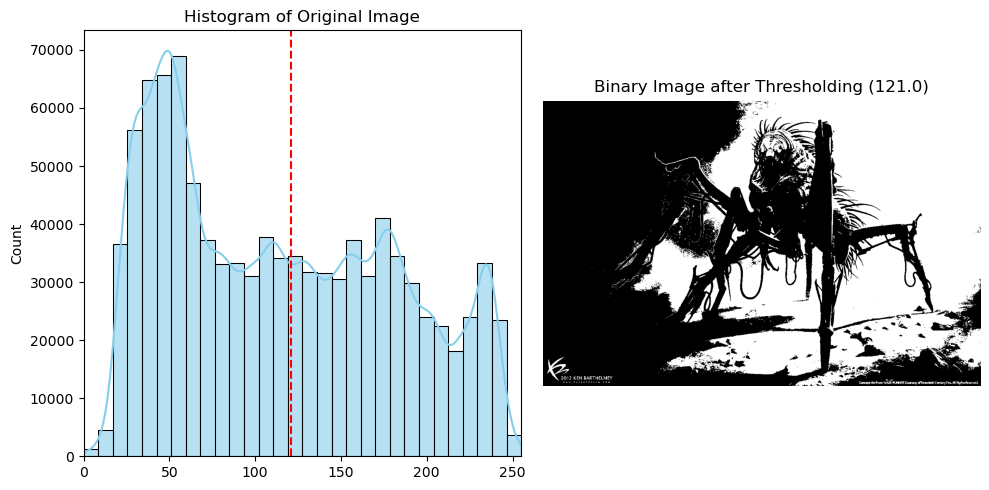

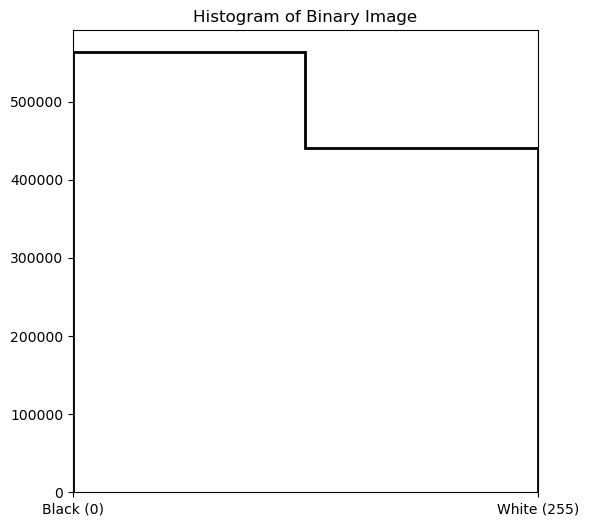

In [156]:
def otsu_thresholding(image):
    # Apply Otsu's thresholding to find the optimal threshold value
    ret, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return ret, binary_image

def plot_histogram_and_threshold(image, threshold_value, binary_image):
    # Plot the histogram of the original image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.axvline(x=threshold_value, color='r', linestyle='--')
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)

    # Plot the binary image after thresholding
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Binary Image after Thresholding ({threshold_value})")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Plot the histogram of the binary image (black and white)
    plt.figure(figsize=(6, 6))
    plt.hist(binary_image.ravel(), bins=2, color='black', histtype='step', linewidth=2)
    plt.title("Histogram of Binary Image")
    plt.xticks([0, 255], ['Black (0)', 'White (255)'])
    plt.xlim(0, 255)
    plt.show()

# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Apply Otsu's Thresholding
threshold_value, binary_image = otsu_thresholding(image)

# Plot the histogram and the binary image
plot_histogram_and_threshold(image, threshold_value, binary_image)


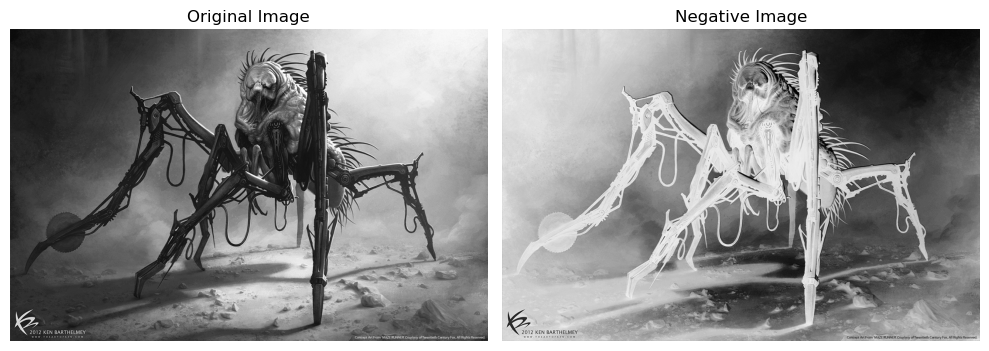

In [154]:
def negative_image(image):
    # Invert the pixel values to create the negative image
    return 255 - image

def plot_negative_image(original_image, negative_img):
    # Plot the original and negative images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Negative Image
    plt.subplot(1, 2, 2)
    plt.imshow(negative_img, cmap='gray')
    plt.title("Negative Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/greiver.jpg", 0)

# Create the negative image
negative_img = negative_image(image)

# Plot both the original and negative images
plot_negative_image(image, negative_img)


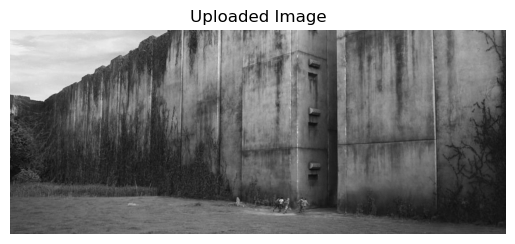

In [188]:
import cv2

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/tmr2.jpg", 0)

# Display the uploaded image
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

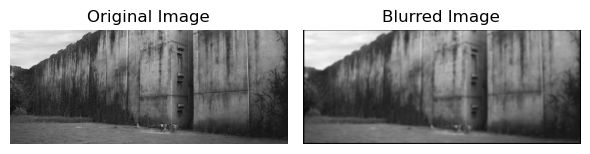

In [170]:
import numpy as np
# Function to Blur the image
def manual_blur(image, kernel_size=5):
    # Define a box filter kernel (mean filter) with dynamic size
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    # Pad the image to handle borders
    image_padded = np.pad(image, ((kernel_size // 2, kernel_size // 2),
                                  (kernel_size // 2, kernel_size // 2)), mode='constant')
    result = np.zeros_like(image)  # To store the filtered image
    # Apply the filter manually (convolution)
    for i in range(kernel_size // 2, image.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, image.shape[1] - kernel_size // 2):
            # Apply the filter to the neighborhood of the current pixel
            region = image_padded[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                  j - kernel_size // 2:j + kernel_size // 2 + 1]  # kernel_size x kernel_size region
            result[i, j] = np.sum(region * kernel)  # Convolution operation
    return result

# Apply manual blurring
blurred_image = manual_blur(image, kernel_size=9)
# Display the result
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Blurred Image")
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


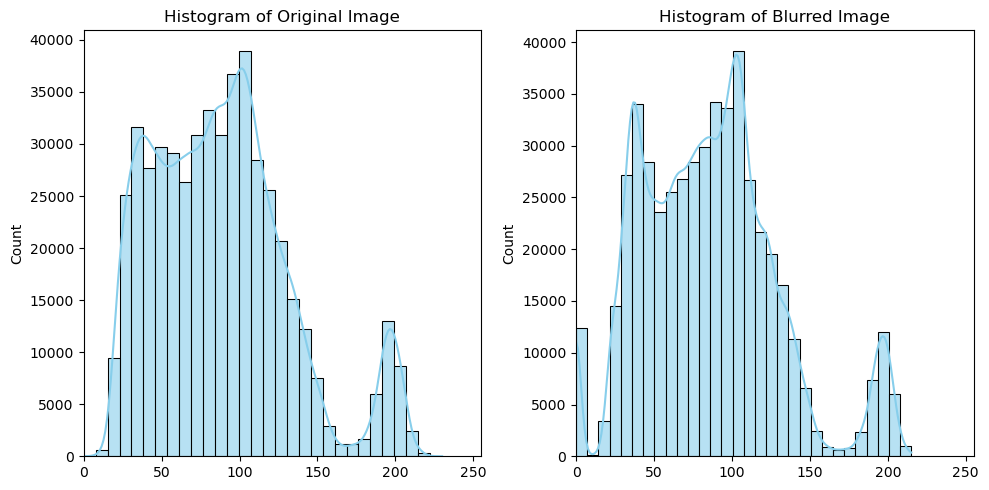

In [172]:
# Plot histograms
plot_histograms(image, blurred_image, filter_name="Blurred Image")

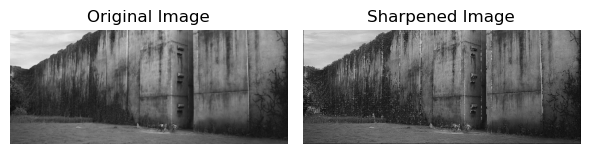

In [178]:
# Function to Sharpen the image
def manual_sharpen(image):
    # Define the sharpening kernel
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])  # Sharpening filter
    # Ensure the image has the correct shape (2D for grayscale)
    if len(image.shape) == 3:  # if the image has 3 channels (RGB), convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Padding the image with zeros (black padding) around the border
    image_padded = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    # Create an empty result array of the same shape as the original image
    result = np.zeros_like(image)
    # Apply the filter manually (convolution)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Apply the filter to the neighborhood of the current pixel
            region = image_padded[i-1:i+2, j-1:j+2]  # 3x3 region
            result[i, j] = np.sum(region * kernel)  # Convolution operation  
    # Ensure the result is clipped to the valid range [0, 255]
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

# Apply manual sharpening
sharpened_image = manual_sharpen(image)
# Display the result
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


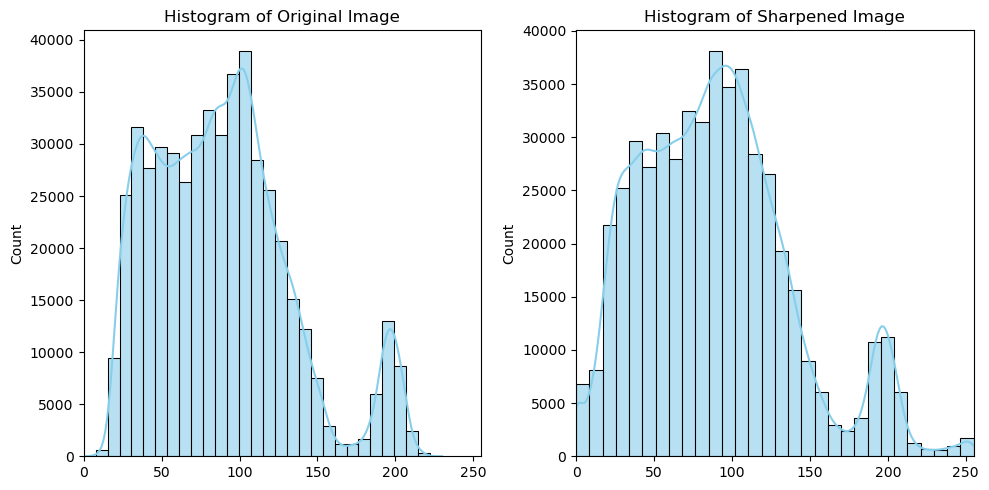

In [180]:
# Plot histograms
plot_histograms(image, sharpened_image, filter_name="Sharpened Image")


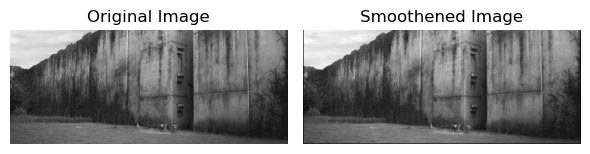

In [182]:
# Function to Sharpen the image
def Smoothened_blur(image, kernel_size=5, sigma=1.0):
    # Generate a Gaussian kernel
    kernel = np.zeros((kernel_size, kernel_size), np.float32)
    center = kernel_size // 2
    # Create a 5x5 Gaussian kernel (you can adjust size and sigma)
    for x in range(kernel_size):
        for y in range(kernel_size):
            kernel[x, y] = (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)  # Normalize the kernel
    image_padded = np.pad(image, ((center, center), (center, center)), mode='constant')  # Padding the image
    result = np.zeros_like(image)  # To store the filtered image
    # Apply the filter manually (convolution)
    for i in range(center, image.shape[0] - center):
        for j in range(center, image.shape[1] - center):
            # Apply the filter to the neighborhood of the current pixel
            region = image_padded[i-center:i+center+1, j-center:j+center+1]  # kernel_size x kernel_size region
            result[i, j] = np.sum(region * kernel)  # Convolution operation
    return result
# Load the image in grayscale

# Apply manual Gaussian blur
Smoothened_image = manual_gaussian_blur(image, kernel_size=5, sigma=1.0)
# Display the result
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Smoothened Image")
plt.imshow(Smoothened_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


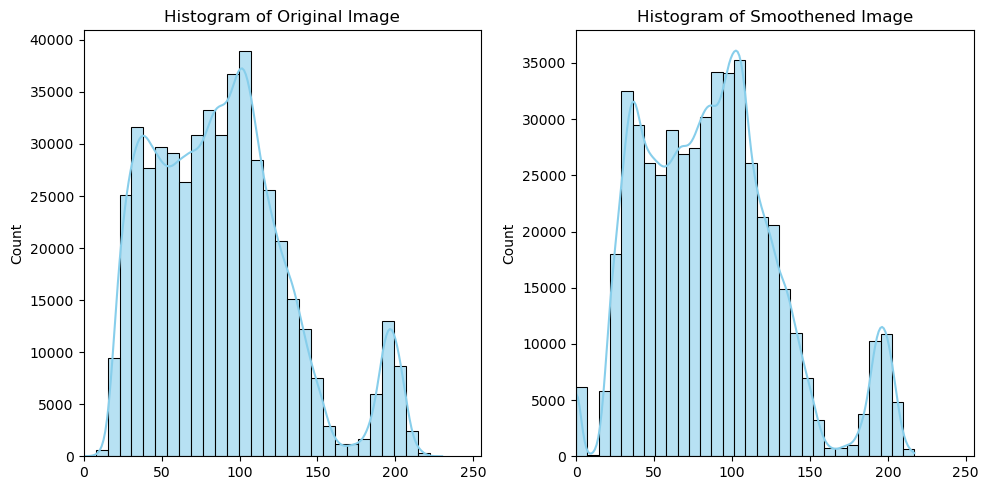

In [184]:
# Plot histograms
plot_histograms(image, Smoothened_image, filter_name="Smoothened Image")

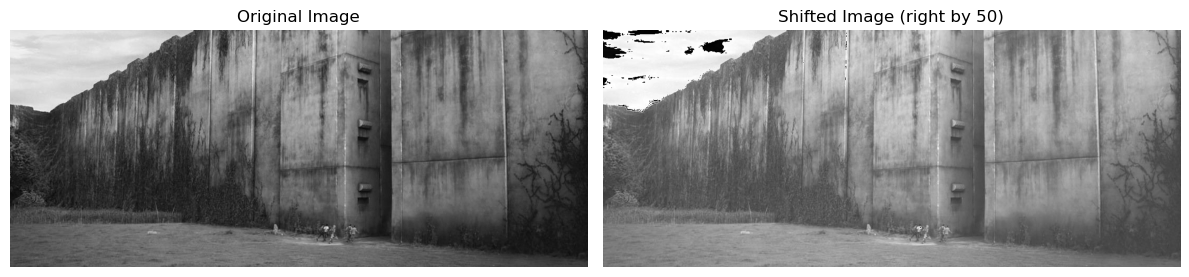

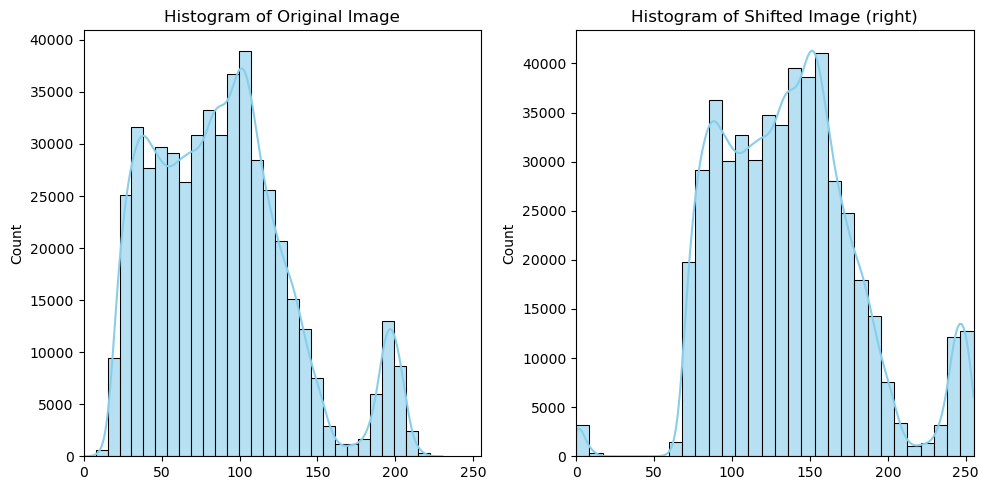

In [190]:
# Function to shift the image histogram to the left or right
def shift_histogram(image, shift_value, direction="right"):
    # Ensure the image values are in the valid range (0-255)
    if direction == "right":
        shifted_image = np.clip(image + shift_value, 0, 255)
    elif direction == "left":
        shifted_image = np.clip(image - shift_value, 0, 255)
    else:
        raise ValueError("Direction should be either 'right' or 'left'")
    return shifted_image
# Function to plot the histogram and image
def plot_image_and_histograms(original_image, shifted_image, shift_value, direction):
    # Plot the original and shifted images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Original Image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    # Shifted Image
    axes[1].imshow(shifted_image, cmap='gray')
    axes[1].set_title(f"Shifted Image ({direction} by {shift_value})")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    # Plot the histograms
    plt.figure(figsize=(10, 5))
    # Original Image Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(original_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)
    # Shifted Image Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(shifted_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title(f"Histogram of Shifted Image ({direction})")
    plt.xlim(0, 255)
    plt.tight_layout()
    plt.show()
# Load the image in grayscale

# Shift the image histogram to the right by 50
shifted_image_right = shift_histogram(image, 50, direction="right")
plot_image_and_histograms(image, shifted_image_right, 50, direction="right")

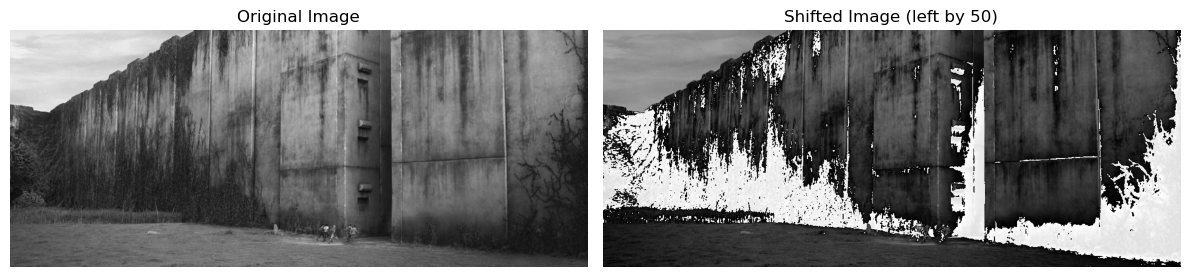

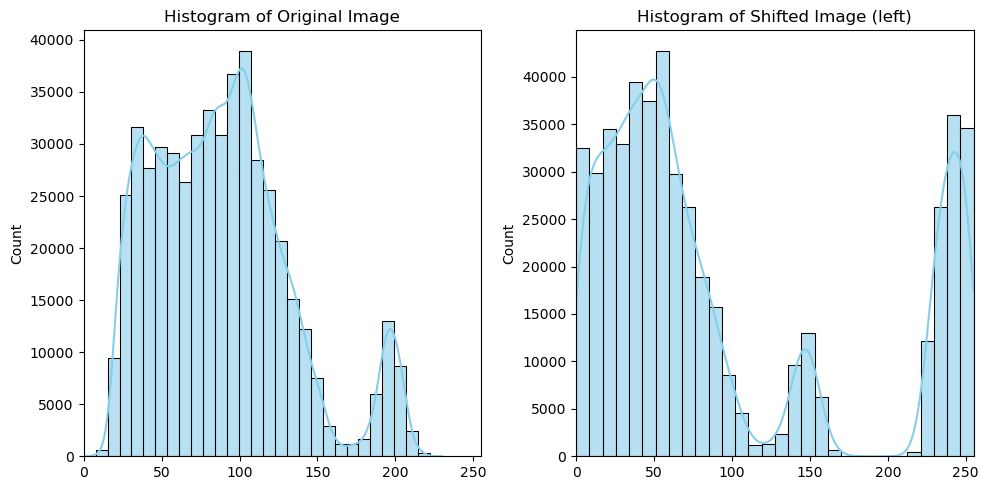

In [192]:
# Shift the image histogram to the left by 50
shifted_image_left = shift_histogram(image, 50, direction="left")
plot_image_and_histograms(image, shifted_image_left, 50, direction="left")


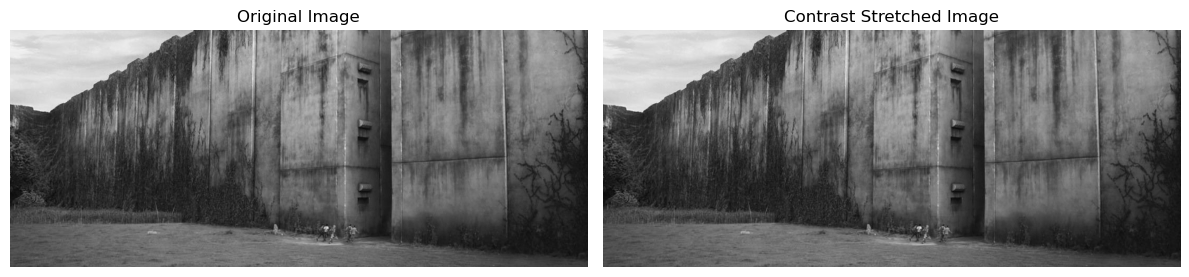

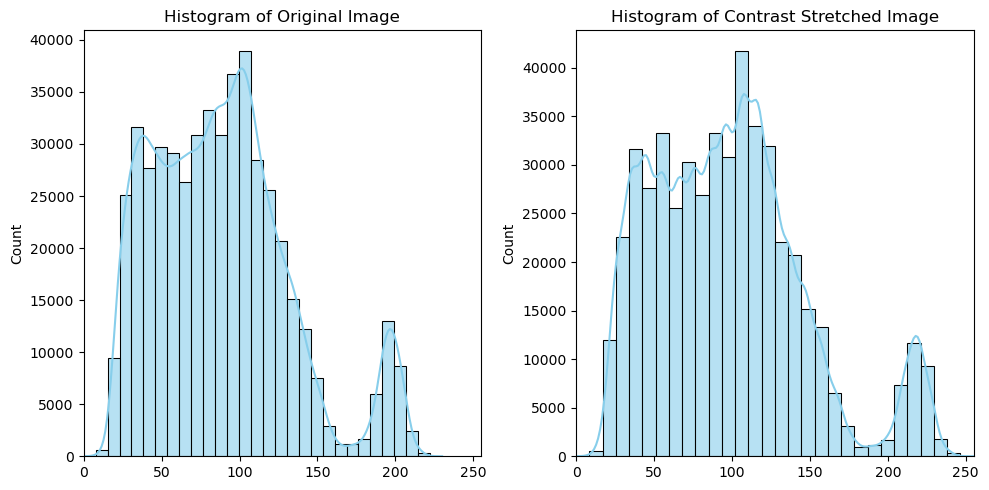

In [194]:
# Function for Contrast Stretching
def contrast_stretching(image):
    # Get the minimum and maximum pixel values in the original image
    R_min = np.min(image)
    R_max = np.max(image)
    # Apply contrast stretching formula
    S = (image - R_min) * (255 / (R_max - R_min))
    # Convert to uint8 to ensure valid pixel values (0-255)
    S = np.uint8(S)
    return S
# Apply contrast stretching
contrast_stretched_image = contrast_stretching(image)
# Plot the original and contrast stretched images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')
# Contrast Stretched Image
axes[1].imshow(contrast_stretched_image, cmap='gray')
axes[1].set_title("Contrast Stretched Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()
# Plot the histograms
plt.figure(figsize=(10, 5))
# Original Image Histogram
plt.subplot(1, 2, 1)
sns.histplot(image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Original Image")
plt.xlim(0, 255)
# Contrast Stretched Image Histogram
plt.subplot(1, 2, 2)
sns.histplot(contrast_stretched_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Contrast Stretched Image")
plt.xlim(0, 255)
plt.tight_layout()
plt.show()


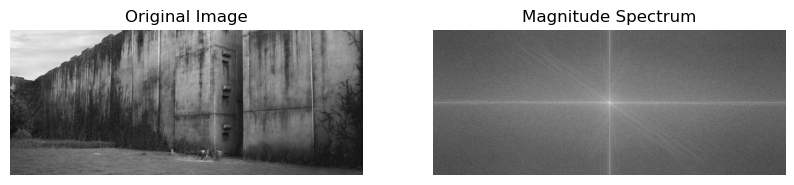

In [196]:
# Perform DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
# Shift the zero frequency component to the center
dft_shift = np.fft.fftshift(dft)
# Calculate the magnitude spectrum (log scale for visibility)
magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude_spectrum = np.log(magnitude_spectrum + 1)
# Plot the original image and the magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()


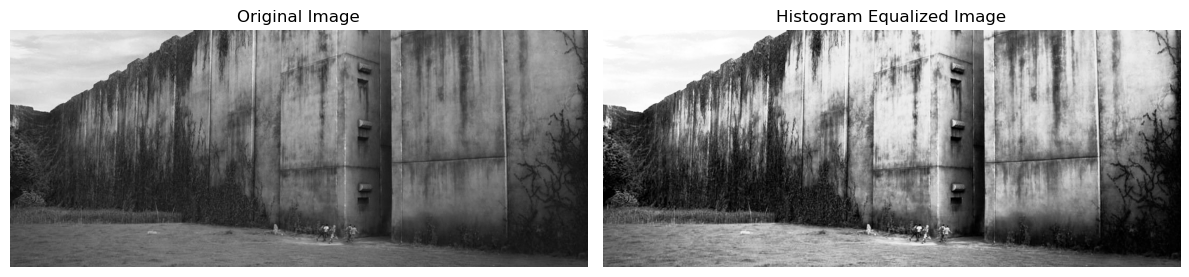

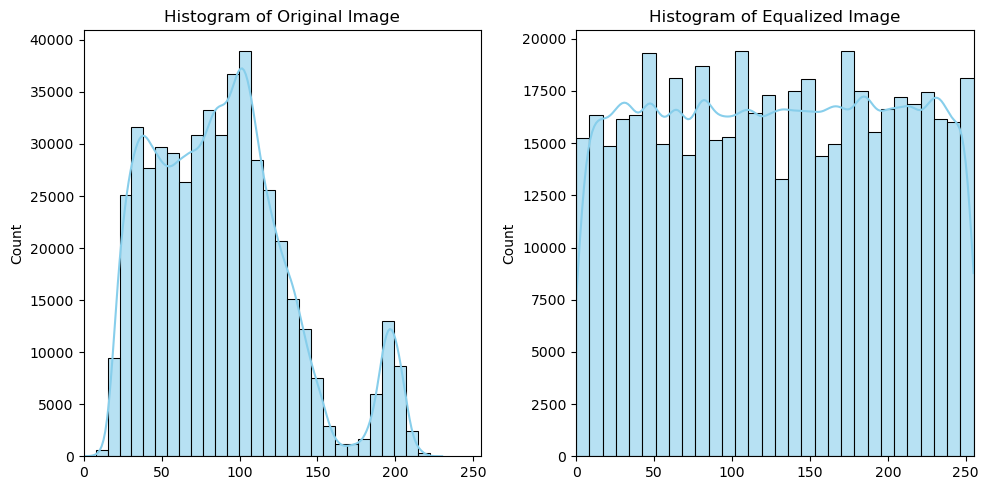

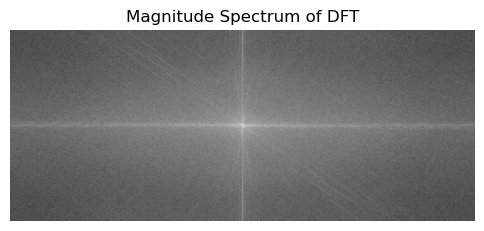

In [198]:
def apply_histogram_equalization(image):
    # Apply histogram equalization to the image
    return cv2.equalizeHist(image)
def compute_dft(image):
    # Convert the image to float32 for DFT
    image_float32 = np.float32(image)
    # Compute the DFT of the image
    dft = cv2.dft(image_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    # Shift the zero frequency component to the center
    dft_shift = np.fft.fftshift(dft)
    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
    return dft_shift, magnitude_spectrum
def plot_image_and_histograms(original_image, eq_image, magnitude_spectrum):
    # Plot the original and histogram equalized images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Original Image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    # Equalized Image
    axes[1].imshow(eq_image, cmap='gray')
    axes[1].set_title("Histogram Equalized Image")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    # Plot the histograms
    plt.figure(figsize=(10, 5))
    # Original Image Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(original_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)
    # Equalized Image Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(eq_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title("Histogram of Equalized Image")
    plt.xlim(0, 255)
    plt.tight_layout()
    plt.show()
    # Plot the Magnitude Spectrum of the DFT
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title("Magnitude Spectrum of DFT")
    plt.axis('off')
    plt.show()
# Apply histogram equalization
equalized_image = apply_histogram_equalization(image)
# Compute the DFT and magnitude spectrum of the equalized image
dft_shift, magnitude_spectrum = compute_dft(equalized_image)
# Plot images, histograms, and magnitude spectrum
plot_image_and_histograms(image, equalized_image, magnitude_spectrum)


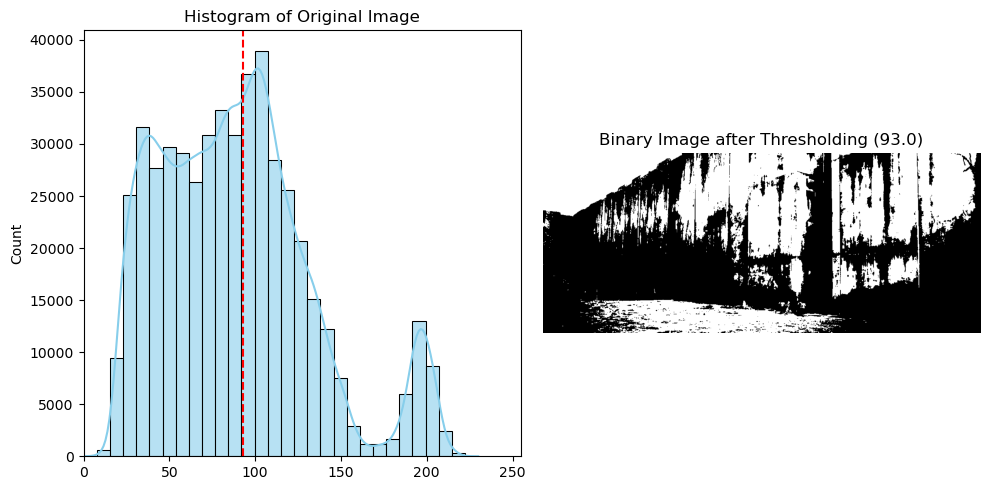

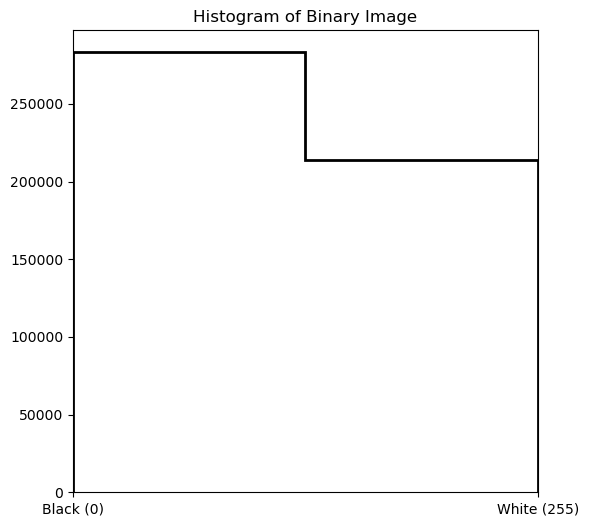

In [202]:
def otsu_thresholding(image):
    # Apply Otsu's thresholding to find the optimal threshold value
    ret, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return ret, binary_image
def plot_histogram_and_threshold(image, threshold_value, binary_image):
    # Plot the histogram of the original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.axvline(x=threshold_value, color='r', linestyle='--')
    plt.title("Histogram of Original Image")
    plt.xlim(0, 255)
    # Plot the binary image after thresholding
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Binary Image after Thresholding ({threshold_value})")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    # Plot the histogram of the binary image (black and white)
    plt.figure(figsize=(6, 6))
    plt.hist(binary_image.ravel(), bins=2, color='black', histtype='step', linewidth=2)
    plt.title("Histogram of Binary Image")
    plt.xticks([0, 255], ['Black (0)', 'White (255)'])
    plt.xlim(0, 255)
    plt.show()
# Apply Otsu's Thresholding
threshold_value, binary_image = otsu_thresholding(image)
# Plot the histogram and the binary image
plot_histogram_and_threshold(image, threshold_value, binary_image)


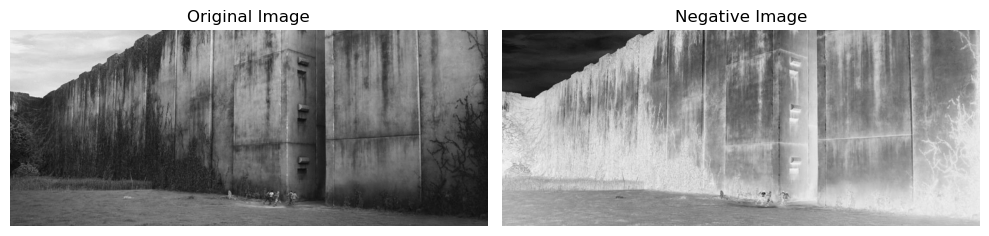

In [206]:
def negative_image(image):
    # Invert the pixel values to create the negative image
    return 255 - image
def plot_negative_image(original_image, negative_img):
    # Plot the original and negative images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    # Negative Image
    plt.subplot(1, 2, 2)
    plt.imshow(negative_img, cmap='gray')
    plt.title("Negative Image")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create the negative image
negative_img = negative_image(image)
# Plot both the original and negative images
plot_negative_image(image, negative_img)
